In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2025-10-09 19:54:42.335673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760039682.747222      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760039682.866357      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])
# 0 - tumor
# 1 - Normal

OneHotEncoder()

In [7]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [9]:

paths = []

for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128, 3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [10]:
data = np.array(data)
data.shape

(208, 128, 128, 3)

In [11]:
result = np.array(result)
result = result.reshape(208,2)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size = 0.2, shuffle = True, random_state = 0)

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(32, kernel_size=(2,2), activation = 'relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation= 'softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax')

In [21]:
y_train.shape

(166, 2)

In [22]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/30


I0000 00:00:1760043229.484355     129 service.cc:148] XLA service 0x796a50012d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760043229.488973     129 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760043229.488994     129 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760043230.048888     129 cuda_dnn.cc:529] Loaded cuDNN version 90300


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 25.8808

I0000 00:00:1760043237.560775     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - loss: 31.4522 - val_loss: 10.3092
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.3282 - val_loss: 11.6631
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.7529 - val_loss: 2.1479
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.7576 - val_loss: 2.9894
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.1392 - val_loss: 3.2009
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.4024 - val_loss: 1.2271
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6650 - val_loss: 0.7626
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1446 - val_loss: 0.7382
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0965 - val_loss: 0.7393
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1236 - val_loss: 0.6686
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1097 - val_loss: 0.6141
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0897 - val_loss: 0.5768
Epoch 13/

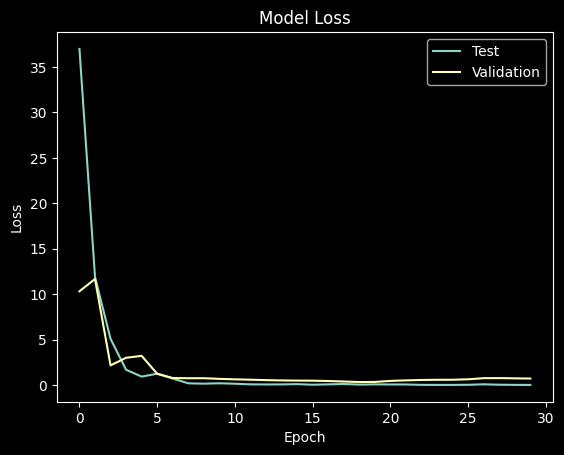

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [24]:
def names(number):
    if number == 0:
        return 'its a tumor'
    else:
        return "no, its not a tumor"

100.0% confidence This is no, its not a tumor


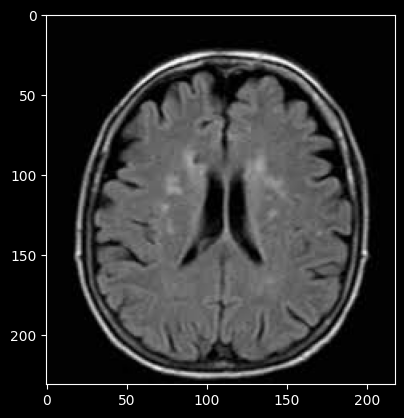

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/17 no.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1, 128, 128, 3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% confidence This is ' + names(classification))